In [1]:
from sklearn.model_selection import train_test_split #数据集划分
from sklearn.preprocessing import StandardScaler #标准化
import numpy as np
from sklearn.linear_model import LogisticRegression
#np.set_printoptions(suppress=True)  不用科学计数法表示
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("data.csv")
df = df.iloc[:, 1::]

In [4]:
X = StandardScaler().fit_transform(df.iloc[:,0:5]) #标准化
X_train,X_test,y_train,y_test = train_test_split(X,df['target'].values,test_size=0.2)

In [5]:
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)
print(y_train)
print(y_train.shape)
print(y_test)
print(y_test.shape)

[[-1.25076721  1.19653624  0.58368282  0.08762279  0.47160768]
 [ 0.77236316 -0.99287646 -0.45888431 -0.57482382  0.00184295]
 [-0.36888987  0.61523021 -0.85972101 -1.18005781 -0.69518585]
 ...
 [-0.12680589  0.28543549 -1.22811333 -1.03557851  1.11769709]
 [-1.31993406  1.19081968  0.9830002  -0.55941506  0.64055061]
 [-1.02021104  1.10152864  0.35340822  0.25722834  1.34553795]]
(98083, 5)
[[-1.60812927  1.17713922  1.63973984 -1.3754912  -1.67399519]
 [ 0.1440976  -0.19095119 -1.17167983 -0.18848753 -0.31544987]
 [ 0.23632007 -0.24157782 -1.22048861  1.65340987 -0.53533676]
 ...
 [ 1.44673995 -1.39907255  1.21714481  0.99763778  1.26511186]
 [-1.20465597  1.24304681  0.58290177 -1.38930676 -2.116926  ]
 [-0.71472412  0.99943676 -0.27377523 -0.08475293  0.01050337]]
(24521, 5)
[3 1 3 ... 3 0 0]
(98083,)
[1 3 1 ... 2 2 3]
(24521,)


In [9]:
#决策树
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #创建模型实例
clf.fit(X_train,y_train)#训练样本
y_train_pred = clf.predict(X_train)#训练样本预测，经验误差
y_test_pred = clf.predict(X_test)#测试样本训练，泛化误差
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.9606251847924717
0.8865870070551772


In [7]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() #创建模型实例
model.fit(X_train,y_train)#训练样本
y_train_pred = model.predict(X_train)#训练样本预测，经验误差
y_test_pred = model.predict(X_test)#测试样本训练，泛化误差
print(accuracy_score(y_train,y_train_pred)) #训练精度
print(accuracy_score(y_test,y_test_pred))#测试精度

0.9450567376609607
0.9019615839484524


## 网格搜索调参

In [9]:
#KNN
import time
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
#划分数据集
start =time.clock()
X = StandardScaler().fit_transform(df.iloc[:,0:5]) #标准化
X_train,X_test,y_train,y_test = train_test_split(X,df['target'].values,test_size=0.2)

knn_model = KNeighborsClassifier() #创建K近邻算法实例

#超参数设置调优
n_neighbors = [3,5,7,9,11,13,15,17] #近邻样本数

algorithm = ["ball_tree","kd_tree","brute"] #采样的算法

p=[1,2] #距离度量， 1：曼哈顿距离 2：欧氏距离

param_grid = dict(n_neighbors = n_neighbors,algorithm = algorithm ,p = p) #参数网格

kflod = StratifiedKFold(n_splits=10,shuffle=True,random_state=0) #分层采样交叉验证

grid_search = GridSearchCV(knn_model, param_grid, scoring = "accuracy", cv = kflod) #网格搜索

grid_result = grid_search.fit(X_train,y_train)  #运行网格搜索，拟合数据

print("=" * 80)

print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))

print("-" * 80)

means = grid_result.cv_results_["mean_test_score"]

params = grid_result.cv_results_['params']

for means,params in zip(means,params):
    print("%f with: %r"% (means,params))
end = time.clock()   
print('Running time: %s Seconds'%(end-start))    

D:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


Best: 0.921495 using {'algorithm': 'brute', 'n_neighbors': 17, 'p': 1}
--------------------------------------------------------------------------------
0.908537 with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
0.903174 with: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}
0.914032 with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1}
0.907374 with: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2}
0.916703 with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1}
0.910484 with: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2}
0.918793 with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1}
0.911422 with: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2}
0.919578 with: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1}
0.912115 with: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2}
0.920506 with: {'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 1}
0.912105 with: {'algorithm': 'ball_tree', 'n_neighbors': 13, 'p': 2}
0.920894 with: {'algorithm':

D:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


各性能指标：
test_accuracy = 0.914155, macro_P = 0.914671, micro_R = 0.914155, f1_micro = 0.914155, f1_weight = 0.914467, fbeta = 0.914289


D:\Users\msi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


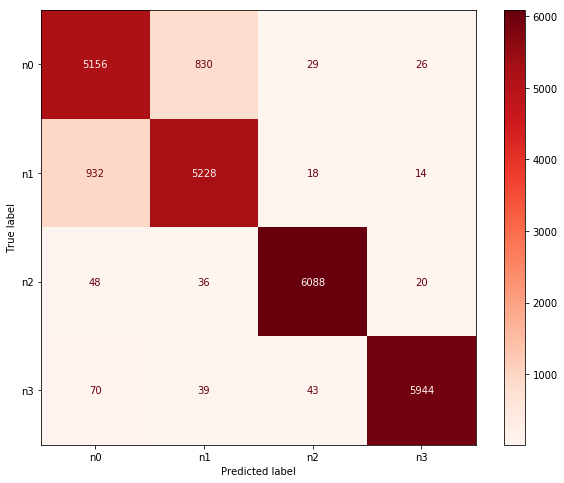

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix


model = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"],
                            algorithm = grid_result.best_params_['algorithm'],
                            p = grid_result.best_params_['p'])
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test) #对测试样本进行预测，分类

#计算模型的泛化能力的性能指标

test_acc = metrics.accuracy_score(y_test, y_test_pred) #分类正确率

#查准率，混淆矩阵第一列，也叫精确率，查全率,混淆矩阵第一行，也叫召回率
macro_P = metrics.precision_score(y_test, y_test_pred, average = "macro") #macro为宏查准率
#多分类宏查准率，先求所有的混淆矩阵的查准率，然后求平均
#多分类微查准率，先将所有混淆矩阵的四个元素平均，然后再求查准率
micro_R = metrics.recall_score(y_test, y_test_pred, average = "micro") #微查全率(召回率)
f1_micro = metrics.f1_score(y_test, y_test_pred, average = "micro") #F1
f1_weight = metrics.f1_score(y_test, y_test_pred, average = "weighted") #加权
fbeta = metrics.fbeta_score(y_test, y_test_pred, average = "macro", beta = 1) #Fbeta的意思是，召回率的重要程度是精确率的beta倍
print("各性能指标：")
print("test_accuracy = %f, macro_P = %f, micro_R = %f, f1_micro = %f, f1_weight = %f, fbeta = %f"
     %(test_acc, macro_P, micro_R, f1_micro, f1_weight, fbeta))

#绘制混淆矩阵
fig, ax = plt.subplots(figsize = (10,8))
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Reds, ax = ax)
plt.show()

In [18]:
#决策树
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
#划分数据集
start =time.clock()
X = StandardScaler().fit_transform(df.iloc[:,0:5]) #标准化
X_train,X_test,y_train,y_test = train_test_split(X,df['target'].values,test_size=0.2)
knn_model = DecisionTreeClassifier() #创建K近邻算法实例
#超参数设置调优
# max_depth = [3,4,5,6,8,10] #最大深度
criterion = ['gini', 'entropy'] #特征选择方法，基尼系数和信息熵
splitter = ['best', 'random'] # 拆分策略
param_grid = dict(criterion = criterion ,splitter = splitter) #参数网格
kflod = StratifiedKFold(n_splits=10,shuffle=True,random_state=0) #分层采样交叉验证
grid_search = GridSearchCV(knn_model, param_grid, scoring = "accuracy", cv = kflod) #网格搜索
grid_result = grid_search.fit(X_train,y_train)  #运行网格搜索，拟合数据
print("=" * 80)
print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))
print("-" * 80)
means = grid_result.cv_results_["mean_test_score"]
params = grid_result.cv_results_['params']
for means,params in zip(means,params):
    print("%f with: %r"% (means,params))
end = time.clock()   
print('Running time: %s Seconds'%(end-start))    

D:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Best: 0.894120 using {'criterion': 'entropy', 'splitter': 'random'}
--------------------------------------------------------------------------------
0.888258 with: {'criterion': 'gini', 'splitter': 'best'}
0.893519 with: {'criterion': 'gini', 'splitter': 'random'}
0.892142 with: {'criterion': 'entropy', 'splitter': 'best'}
0.894120 with: {'criterion': 'entropy', 'splitter': 'random'}
Running time: 22.02952119999827 Seconds


D:\Users\msi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


各性能指标：
test_accuracy = 0.894947, macro_P = 0.894617, macro_R = 0.894947, f1_macro = 0.893357, f1_weight = 0.895094, fbeta = 0.894316


D:\Users\msi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


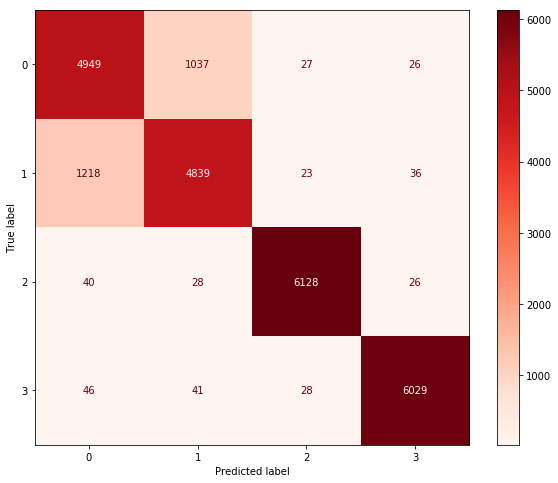

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix


model = DecisionTreeClassifier(criterion = 'entropy',splitter = 'random')
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test) #对测试样本进行预测，分类

#计算模型的泛化能力的性能指标

test_acc = metrics.accuracy_score(y_test, y_test_pred) #分类正确率

#查准率，混淆矩阵第一列，也叫精确率，查全率,混淆矩阵第一行，也叫召回率
macro_P = metrics.precision_score(y_test, y_test_pred, average = "macro") #macro为宏查准率,宏精确率
#多分类宏查准率，先求所有的混淆矩阵的查准率，然后求平均
#多分类微查准率，先将所有混淆矩阵的四个元素平均，然后再求查准率
macro_R = metrics.recall_score(y_test, y_test_pred, average = "macro") #宏查全率(召回率)
f1_macro = metrics.f1_score(y_test, y_test_pred, average = "macro") #F1
f1_weight = metrics.f1_score(y_test, y_test_pred, average = "weighted") #加权
fbeta = metrics.fbeta_score(y_test, y_test_pred, average = "macro", beta = 1) #Fbeta的意思是，召回率的重要程度是精确率的beta倍
print("各性能指标：")
print("test_accuracy = %f, macro_P = %f, macro_R = %f, f1_macro = %f, f1_weight = %f, fbeta = %f"
     %(test_acc, macro_P, micro_R, f1_micro, f1_weight, fbeta))

#绘制混淆矩阵
fig, ax = plt.subplots(figsize = (10,8))
plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Reds, ax = ax)
plt.show()